# Queueing theory - D/D/1 example

#### Issues
* The example works in principle. Now we have to include that there is a maximum quay length (if there is sufficient quay length two vessels could berth at the same time).

### 1. Imports

In [1]:
from scipy import stats

import pandas as pd
import numpy as np
import xlrd

import queueing

import matplotlib.pyplot as plt

### 2. Prepare inputs

#### Read basic arrival data from Excel

In [2]:
df = pd.read_excel('data.xlsx', index_col=None, header=0, sheet_name='info')
df

,name,IAT,ST,AT,length,maxwait,unloading,loading
0,Yellowstar,7,3,2,80,1,2,1
1,ABC,30,7,12,100,2,4,3
2,Oil Trade,18,2,5,100,1,2,0
3,Gen. Cargo Trade,60,4,24,160,2,3,1
4,Fruit Trade,10,6,9,90,0,3,3
5,United,16,5,2,80,2,1,4


#### Read IAT and ST table from Excel

In [3]:
df = pd.read_excel('data.xlsx', index_col=None, header=0, sheet_name='data')
df.head(15)

,name,IAT,ST,AT,maxwait,unloading,loading,length
0,Yellowstar,7,3,2,1,2,1,80
1,United,16,5,2,2,1,4,80
2,Oil Trade,18,2,5,1,2,0,100
3,Yellowstar,7,3,9,1,2,1,80
4,Fruit Trade,10,6,9,0,3,3,90
5,ABC,30,7,12,2,4,3,100
6,Yellowstar,7,3,16,1,2,1,80
7,United,16,5,18,2,1,4,80
8,Fruit Trade,10,6,19,0,3,3,90
9,Yellowstar,7,3,23,1,2,1,80


#### Define the queue object input

In [4]:
A = queueing.arrival_process("D", df[["name","IAT"]])
S = queueing.service_process("D", df[["name","ST"]])
c = 1

#### Create the queue object and use it to create a simulating object

In [5]:
# todo: enable deterministic analyses by adding a list of 'customer_name#', 'interarrival#' and 'servicetime#'
q = queueing.queue(A, S, c)
sim = queueing.simulation(q)

In [6]:
customer_nr=0
A.arrival_distribution.loc[customer_nr, ['name']].item()

'Yellowstar'

### 3. Run the simulation

In [7]:
%%time
print('Start simulation of "{}" queue'.format(q.kendall_notation))
sim.run(30) # nr is the number of customers that will arrive at the server
sim.return_log

Start simulation of "D/D/1/inf/inf/FIFO" queue
7
16
18
7
10
30
7
16
10
7
18
60
10
7
16
7
10
18
30
7
10
16
7
7
18
10
7
16
30
60
Wall time: 104 ms


<bound method simulation.return_log of <queueing.simulation.simulation object at 0x000001E80A4A3CF8>>

In [8]:
sim.return_log()

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,Yellowstar,7,3,7.0,7.0,10.0,3.0,0.0,7.0,0
1,United,16,5,23.0,23.0,28.0,5.0,0.0,13.0,0
2,Oil Trade,18,2,41.0,41.0,43.0,2.0,0.0,13.0,0
3,Yellowstar,7,3,48.0,48.0,51.0,3.0,0.0,5.0,0
4,Fruit Trade,10,6,58.0,58.0,64.0,6.0,0.0,7.0,0
5,ABC,30,7,88.0,88.0,95.0,7.0,0.0,24.0,1
6,Yellowstar,7,3,95.0,95.0,98.0,3.0,0.0,0.0,0
7,United,16,5,111.0,111.0,116.0,5.0,0.0,13.0,0
8,Fruit Trade,10,6,121.0,121.0,127.0,6.0,0.0,5.0,0
9,Yellowstar,7,3,128.0,128.0,131.0,3.0,0.0,1.0,0


### 4. Analyse and visualise results

#### Get statistics

In [9]:
print('--- simulation statistics ---')
sim.get_stats()

--- simulation statistics ---
Average IAT: 16.97 [seconds]
Average ST: 4.27 [seconds]

Total number of customers: 30.00
Average nr arrivals: 212.20 [# per hour]
Average nr services: 815.62 [# per hour]

Total waiting time: 0.00 [seconds]
Average waiting time of all customers: 0.00 [seconds]
Average waiting time of customers that waited: nan [seconds]

Probability of idle server (nobody in the system): 0.7419
Probability that somebody is waiting: 0.0667
Probability that nobody is waiting: 0.9333
Probability that 1 person is waiting: 0.0667
Probability that 2 persons are waiting: 0.0000
Probability that 3 persons are waiting: 0.0000
Probability that 9 persons are waiting (10 in system): 0.0000

Total service time: 128.00 [seconds]
Average total time a customer spent in the system: 4.27 [seconds]
Average waiting time as a fraction of ST: 0.00

System utilisation: 0.2581


c:\checkouts\github\queueing-theory\queueing\simulation.py:142: RuntimeWarning: invalid value encountered in double_scalars
  print('Average waiting time of customers that waited: {:.2f} [seconds]'.format(np.sum(self.log["TCWQ"]) / np.sum(np.array(self.log["TCWQ"]) != 0)))


**Analytical solution: M_M_1_inf_inf_FIFO**

    arrival rate: 8.0000 per hour
    service rate: 9.0000 per hour
    rho: 0.8889

    P_0: probability that there are 0 customers in the system = 0.1111
    P_1: probability of 1 customers in the system = 0.0988
    P_10: probability of 10 customers in the system = 0.0342

    no_q: probability that there is nobody in the queue (P_0+P_1) = 0.2099
    util_sys: system utilisation rate  (P_(n>=1)) = 0.8889
    util_ser: server utilisation rate (P_(n>=2)) = 0.7901

    L_s: the long term average number of customers present in the system = 8.0000
    L_q: the long term average number of customers present in the queue = 7.1111
    W_s: the long term average waiting time in the system = 1.0000 hour (= 60.0 minutes)
    W_q: the long term average waiting time in the queue = 0.8889 hour (= 53.3 minutes)

#### Return log

In [11]:
sim.return_log(15)
# c = customer
# IAT = inter arrival time
# ST = service time
# AT = arrival time
# TSB = time service begins
# TSE = time service ends
# TCSS = time customer spends in the system
# TCWQ = time customer waits in the queue
# ITS = idle time of the server
# QL = queue length

,c_id,IAT,ST,AT,TSB,TSE,TCSS,TCWQ,ITS,QL
0,Yellowstar,7,3,7.0,7.0,10.0,3.0,0.0,7.0,0
1,United,16,5,23.0,23.0,28.0,5.0,0.0,13.0,0
2,Oil Trade,18,2,41.0,41.0,43.0,2.0,0.0,13.0,0
3,Yellowstar,7,3,48.0,48.0,51.0,3.0,0.0,5.0,0
4,Fruit Trade,10,6,58.0,58.0,64.0,6.0,0.0,7.0,0
5,ABC,30,7,88.0,88.0,95.0,7.0,0.0,24.0,1
6,Yellowstar,7,3,95.0,95.0,98.0,3.0,0.0,0.0,0
7,United,16,5,111.0,111.0,116.0,5.0,0.0,13.0,0
8,Fruit Trade,10,6,121.0,121.0,127.0,6.0,0.0,5.0,0
9,Yellowstar,7,3,128.0,128.0,131.0,3.0,0.0,1.0,0


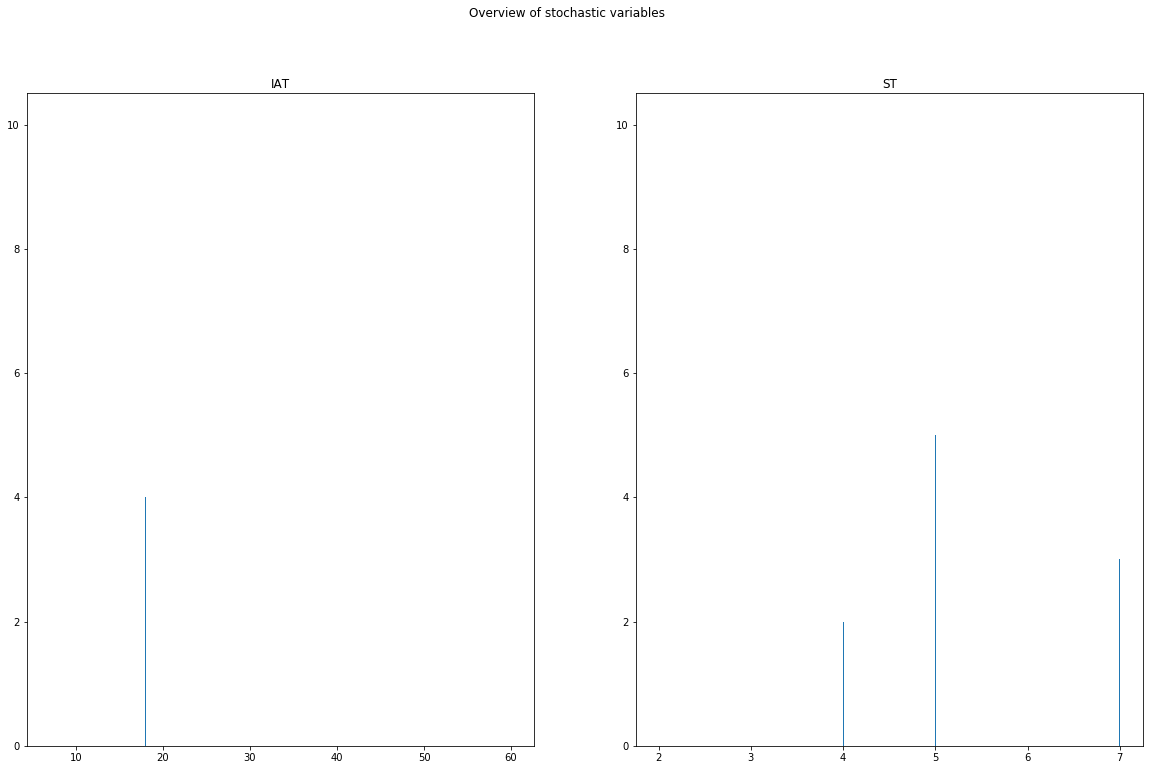

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

fig.suptitle('Overview of stochastic variables')
ax1.hist(sim.log["IAT"],1000); ax1.set_title('IAT');
ax2.hist(sim.log["ST"],1000); ax2.set_title('ST');

## Sandbox